In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
plt.rcParams['font.size'] = 10

In [139]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [140]:
df = pd.read_csv('https://raw.githubusercontent.com/lilfakeS/schulich_data_science/main/conversion_data.csv')

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [142]:
df.head()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1


In [143]:
df.describe(include='all')

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,433,431,1093,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,999.500000,1000.500000,NaN,NaN,NaN,2.541500,2.440500,2.441000,2.256500,2.354000,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,577.494589,NaN,NaN,NaN,1.704914,1.715206,2.343345,2.370974,2.335682,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-4.000000,-3.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,499.750000,500.750000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,999.500000,1000.500000,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1499.250000,1500.250000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


In [144]:
# take abs value of all numeric columns 
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column] = df[column].abs()

In [145]:
df.describe(include='all')

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,433,431,1093,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,999.500000,1000.500000,NaN,NaN,NaN,2.541500,2.440500,2.441000,2.425500,2.451000,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,577.494589,NaN,NaN,NaN,1.704914,1.715206,2.343345,2.197695,2.233628,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,499.750000,500.750000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,999.500000,1000.500000,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1499.250000,1500.250000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


In [146]:
df['avg_rating_Mon'].describe(include='all')

count    2000.000000
mean        3.023990
std         1.151037
min         1.000000
25%         2.017500
50%         3.055000
75%         4.022500
max         5.000000
Name: avg_rating_Mon, dtype: float64

In [147]:
df['time_on_site_Thu'].describe(include='all')

count    2000.000000
mean       40.417000
std        11.892638
min        20.000000
25%        30.000000
50%        40.500000
75%        51.000000
max        60.000000
Name: time_on_site_Thu, dtype: float64

In [148]:
df['visitor_location'].unique()

array(['North America', 'South America', 'Australia', 'Asia', 'Europe'],
      dtype=object)

In [149]:
df['marketing_channel'].unique()

array(['youtube', 'organic', 'instagram', 'facebook', 'google'],
      dtype=object)

In [150]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

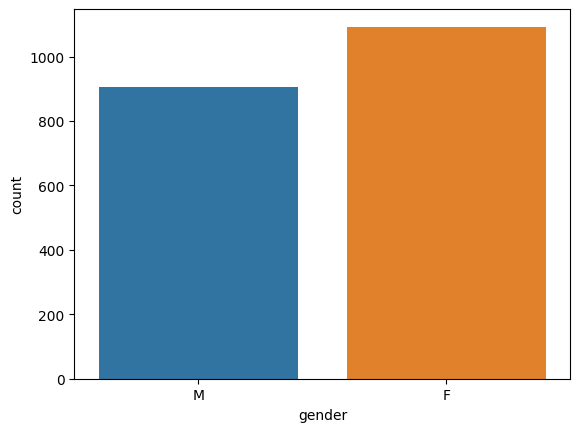

In [151]:
# Display the distribution of 'gender'
sns.countplot(x='gender', data=df)
plt.show()

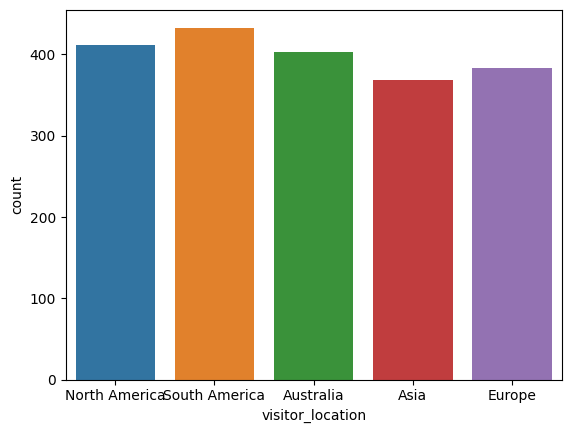

In [152]:
# Display the distribution of 'visitor_locations'
sns.countplot(x='visitor_location', data=df)
plt.show()

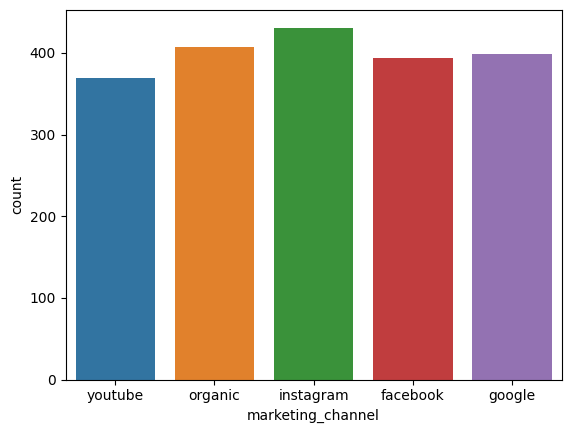

In [153]:
# Display the distribution of 'marketing_channel'
sns.countplot(x='marketing_channel', data=df)
plt.show()

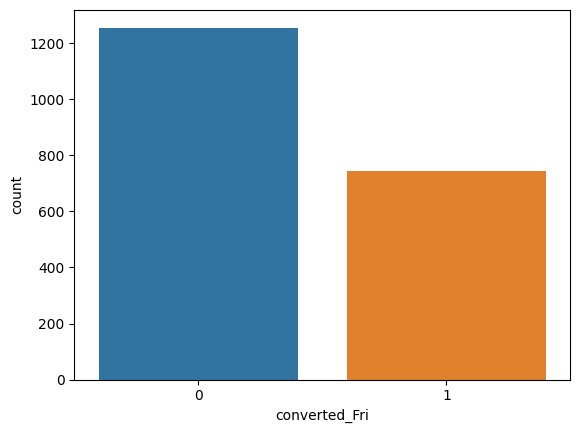

In [154]:
# Display the distribution of 'converted_Fri'
sns.countplot(x='converted_Fri', data=df)
plt.show()

<Axes: xlabel='gender', ylabel='product_views_Fri'>

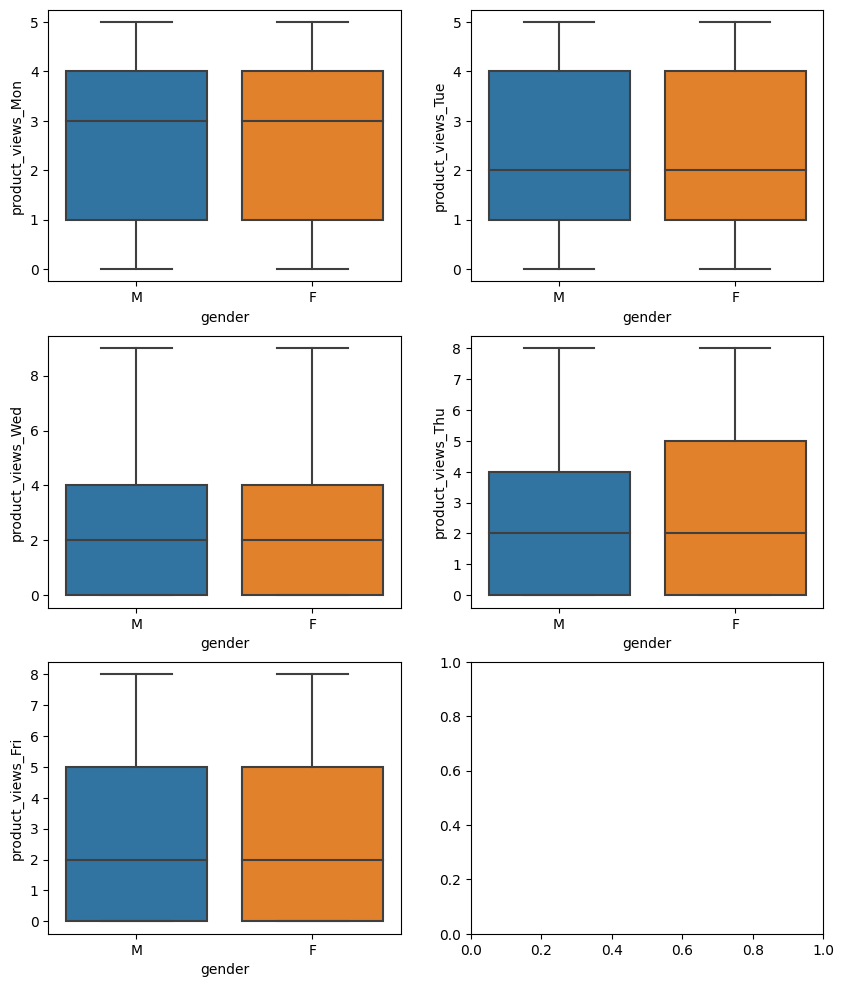

In [155]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 12))

sns.boxplot(x='gender',y='product_views_Mon', data=df, ax=ax1)
sns.boxplot(x='gender',y='product_views_Tue', data=df, ax=ax2)
sns.boxplot(x='gender',y='product_views_Wed', data=df, ax=ax3)
sns.boxplot(x='gender',y='product_views_Thu', data=df, ax=ax4)
sns.boxplot(x='gender',y='product_views_Fri', data=df, ax=ax5)


<Axes: xlabel='gender', ylabel='avg_rating_Fri'>

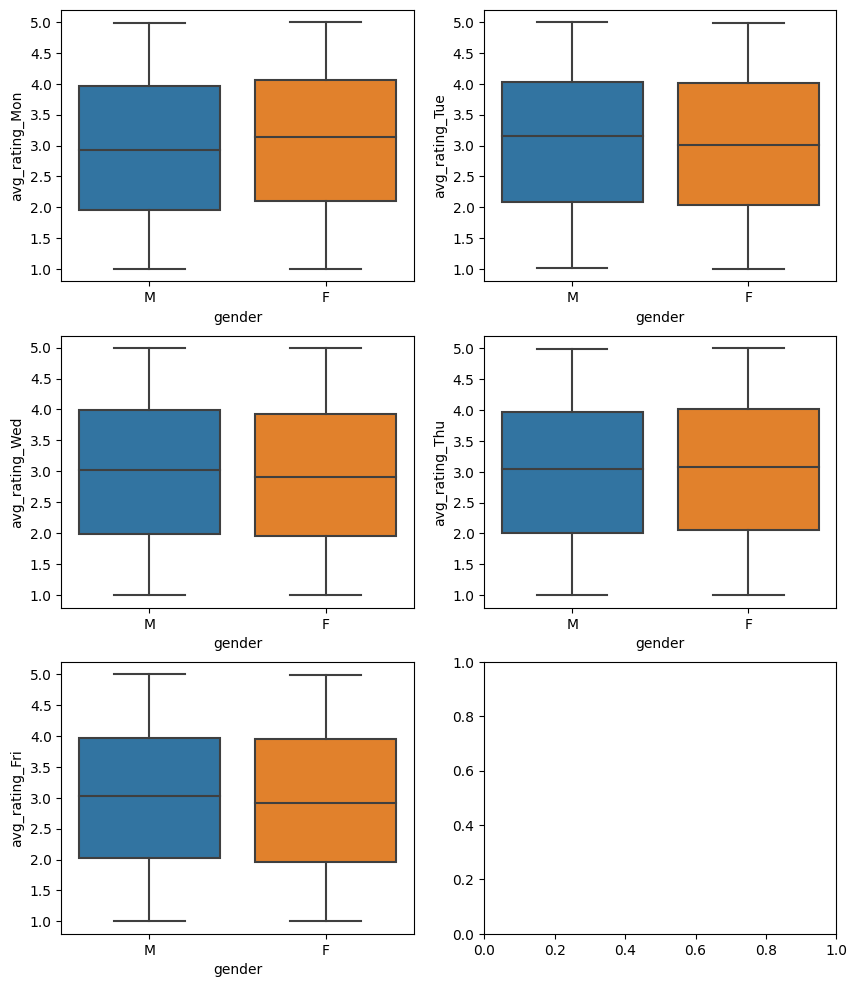

In [156]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 12))

sns.boxplot(x='gender',y='avg_rating_Mon', data=df, ax=ax1)
sns.boxplot(x='gender',y='avg_rating_Tue', data=df, ax=ax2)
sns.boxplot(x='gender',y='avg_rating_Wed', data=df, ax=ax3)
sns.boxplot(x='gender',y='avg_rating_Thu', data=df, ax=ax4)
sns.boxplot(x='gender',y='avg_rating_Fri', data=df, ax=ax5)

<Axes: xlabel='gender', ylabel='avg_price_Fri'>

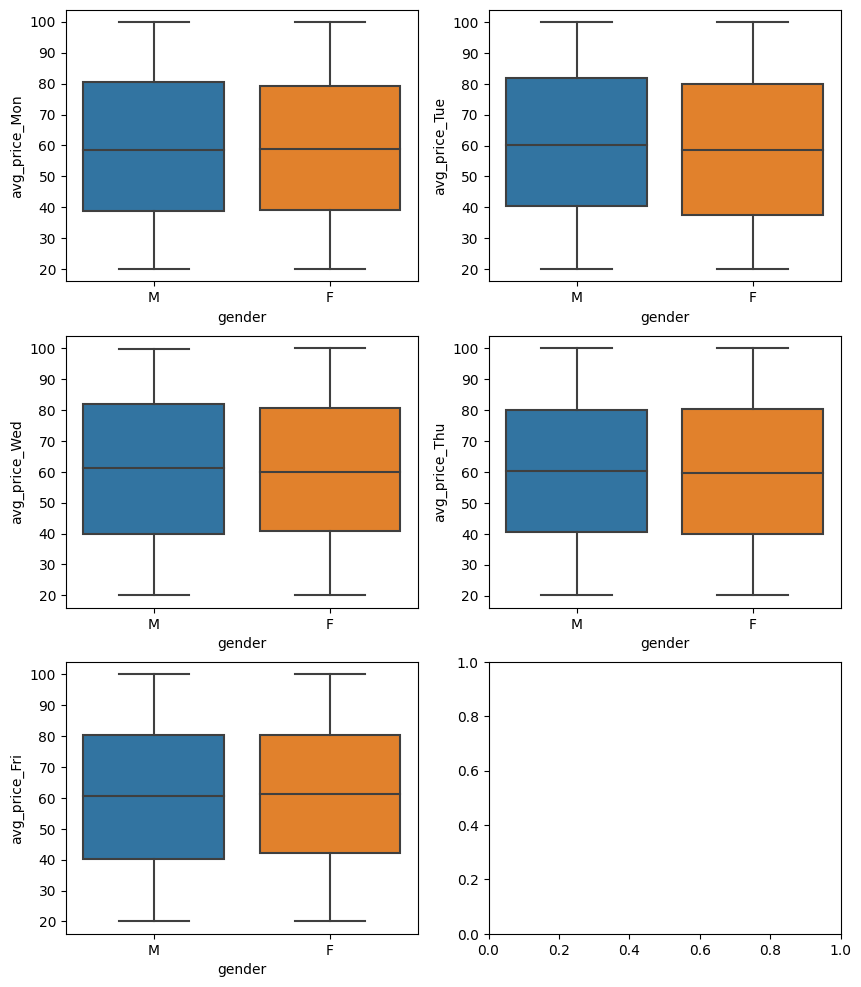

In [157]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 12))

sns.boxplot(x='gender',y='avg_price_Mon', data=df, ax=ax1)
sns.boxplot(x='gender',y='avg_price_Tue', data=df, ax=ax2)
sns.boxplot(x='gender',y='avg_price_Wed', data=df, ax=ax3)
sns.boxplot(x='gender',y='avg_price_Thu', data=df, ax=ax4)
sns.boxplot(x='gender',y='avg_price_Fri', data=df, ax=ax5)

<Axes: xlabel='gender', ylabel='time_on_site_Fri'>

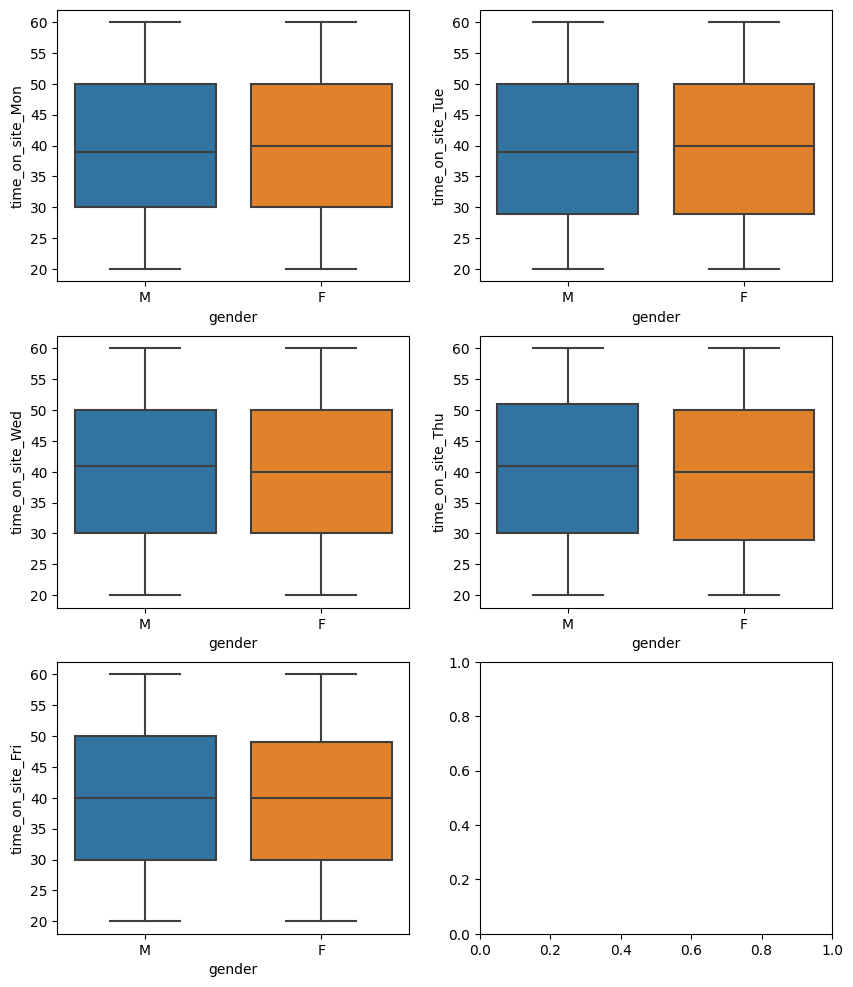

In [158]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 12))

sns.boxplot(x='gender',y='time_on_site_Mon', data=df, ax=ax1)
sns.boxplot(x='gender',y='time_on_site_Tue', data=df, ax=ax2)
sns.boxplot(x='gender',y='time_on_site_Wed', data=df, ax=ax3)
sns.boxplot(x='gender',y='time_on_site_Thu', data=df, ax=ax4)
sns.boxplot(x='gender',y='time_on_site_Fri', data=df, ax=ax5)

<Axes: xlabel='converted_Fri', ylabel='pages_visited_Fri'>

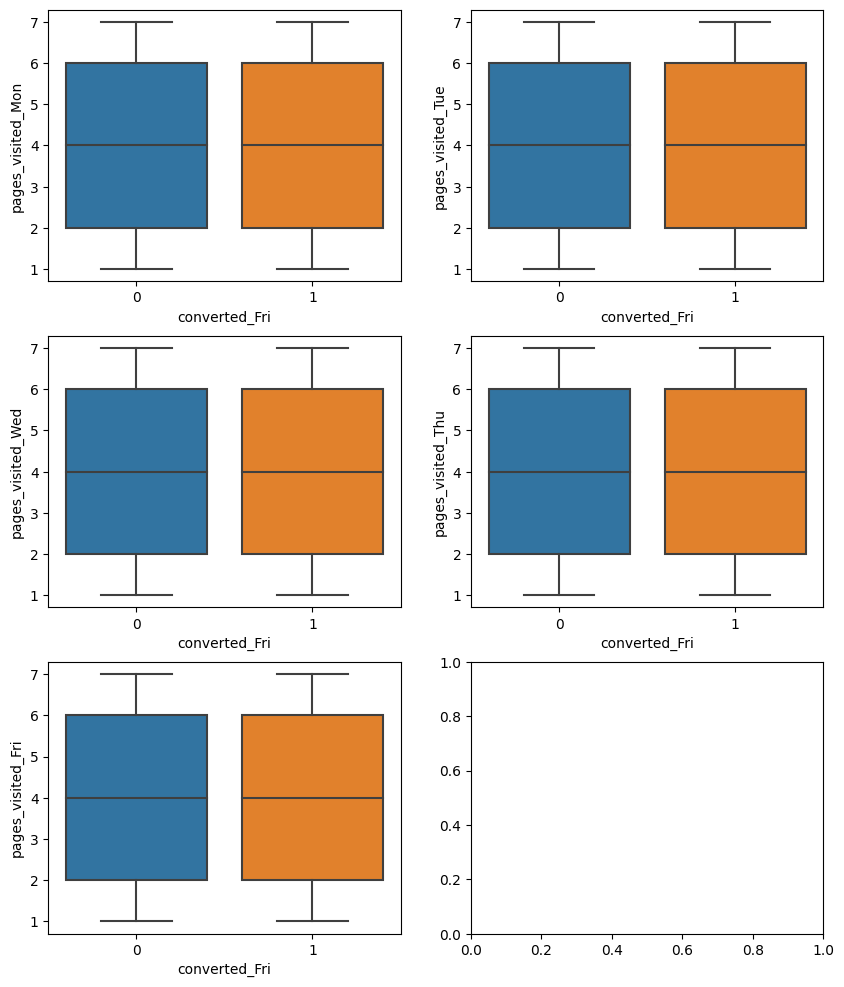

In [159]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 12))

sns.boxplot(x='converted_Fri',y='pages_visited_Mon', data=df, ax=ax1)
sns.boxplot(x='converted_Fri',y='pages_visited_Tue', data=df, ax=ax2)
sns.boxplot(x='converted_Fri',y='pages_visited_Wed', data=df, ax=ax3)
sns.boxplot(x='converted_Fri',y='pages_visited_Thu', data=df, ax=ax4)
sns.boxplot(x='converted_Fri',y='pages_visited_Fri', data=df, ax=ax5)

<Axes: xlabel='gender', ylabel='count'>

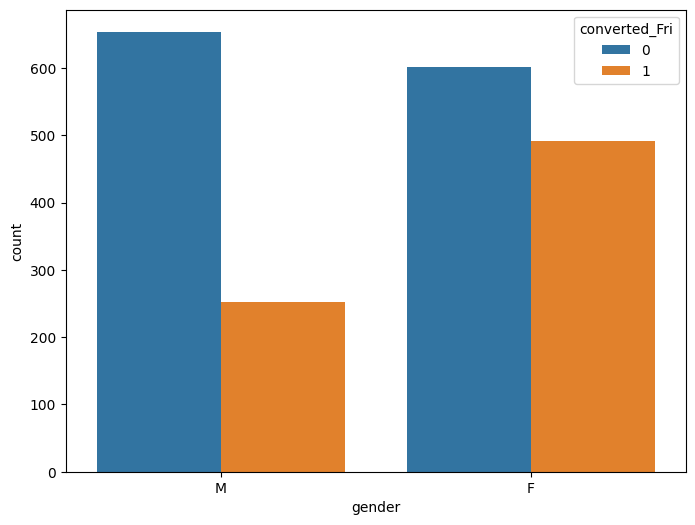

In [160]:
plt.figure(figsize=(8, 6))

sns.countplot(x='gender', hue='converted_Fri', data=df)

<Axes: xlabel='visitor_location', ylabel='count'>

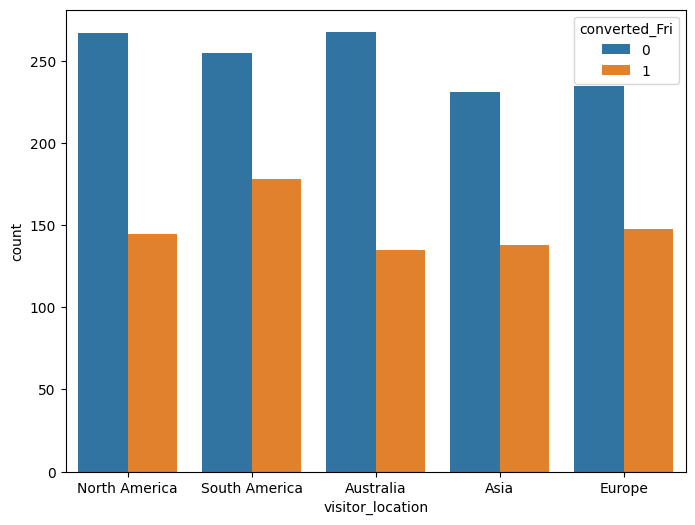

In [161]:
plt.figure(figsize=(8, 6))

sns.countplot(x='visitor_location', hue='converted_Fri', data=df)

<Axes: xlabel='visitor_location', ylabel='count'>

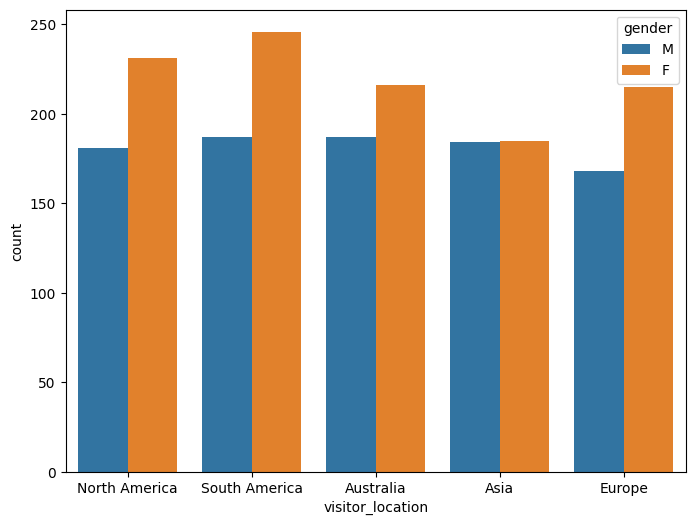

In [162]:
plt.figure(figsize=(8, 6))

sns.countplot(x='visitor_location', hue='gender', data=df)

In [163]:
df['product_views'] = df['product_views_Mon'] + df['product_views_Tue'] + df['product_views_Wed'] + df['product_views_Thu'] + df['product_views_Fri']
df['avg_rating'] = (df['avg_rating_Mon'] + df['avg_rating_Tue'] + df['avg_rating_Wed'] + df['avg_rating_Thu'] + df['avg_rating_Fri']) / 5
df['avg_price'] = (df['avg_price_Mon'] + df['avg_price_Tue'] + df['avg_price_Wed'] + df['avg_price_Thu'] + df['avg_price_Fri']) / 5
df['time_on_site'] = df['time_on_site_Mon'] + df['time_on_site_Tue'] + df['time_on_site_Wed'] + df['time_on_site_Thu'] + df['time_on_site_Fri']
df['pages_visited'] = df['pages_visited_Mon'] + df['pages_visited_Tue'] + df['pages_visited_Wed'] + df['pages_visited_Thu'] + df['pages_visited_Fri']

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

<Axes: xlabel='gender', ylabel='pages_visited'>

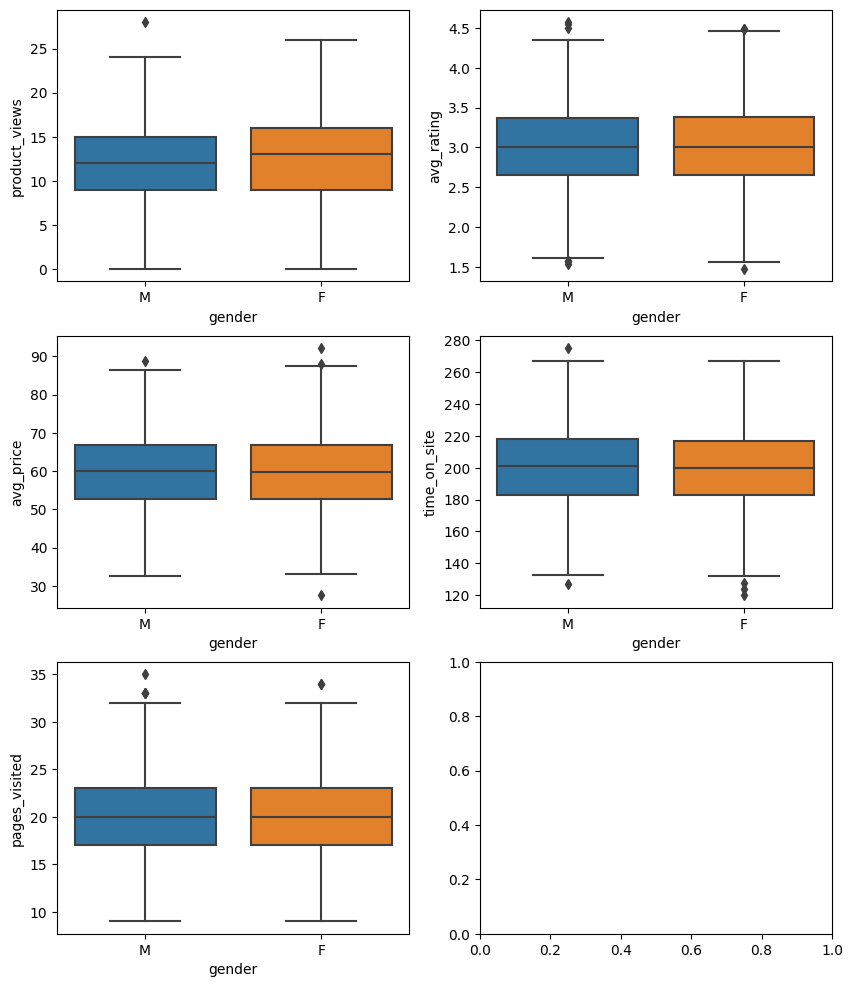

In [165]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 12))

sns.boxplot(x='gender',y='product_views', data=df, ax=ax1)
sns.boxplot(x='gender',y='avg_rating', data=df, ax=ax2)
sns.boxplot(x='gender',y='avg_price', data=df, ax=ax3)
sns.boxplot(x='gender',y='time_on_site', data=df, ax=ax4)
sns.boxplot(x='gender',y='pages_visited', data=df, ax=ax5)

<Axes: xlabel='converted_Fri', ylabel='pages_visited'>

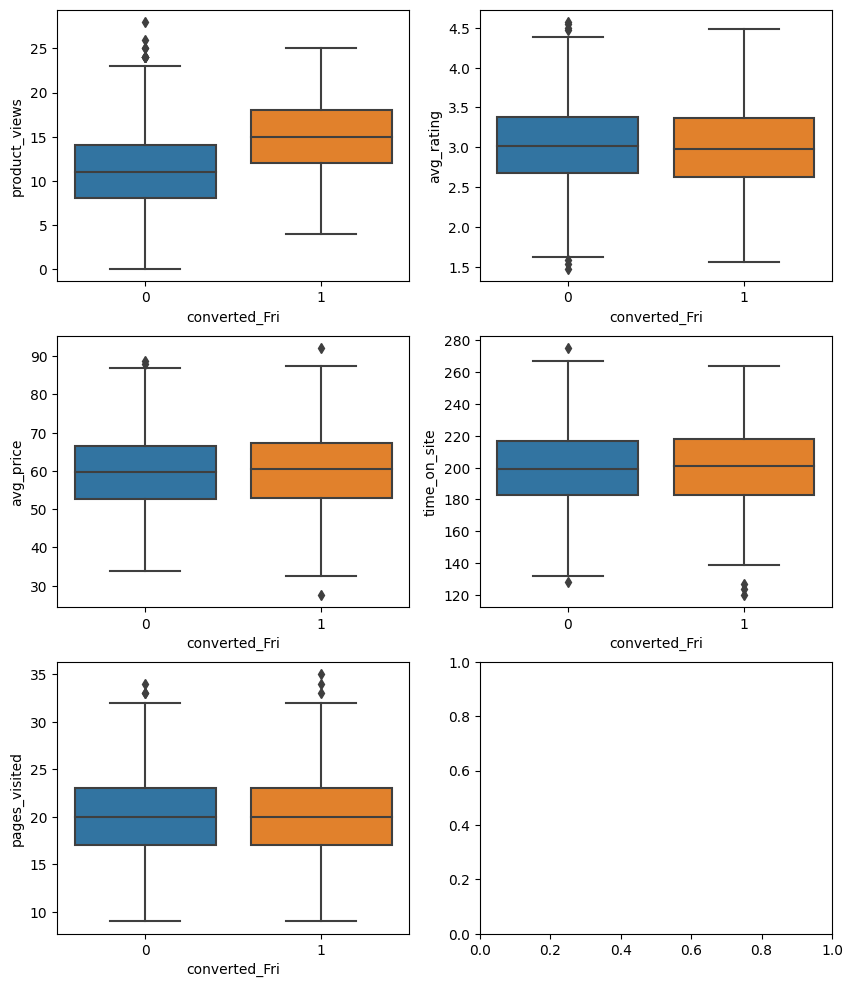

In [166]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 12))

sns.boxplot(x='converted_Fri',y='product_views', data=df, ax=ax1)
sns.boxplot(x='converted_Fri',y='avg_rating', data=df, ax=ax2)
sns.boxplot(x='converted_Fri',y='avg_price', data=df, ax=ax3)
sns.boxplot(x='converted_Fri',y='time_on_site', data=df, ax=ax4)
sns.boxplot(x='converted_Fri',y='pages_visited', data=df, ax=ax5)

In [167]:
columns_to_select = ['visitor_location', 'marketing_channel', 'gender', 'product_views', 'avg_rating', 'time_on_site', 'pages_visited', 'converted_Fri']
new_df = df[columns_to_select]
new_df['converted'] = new_df['converted_Fri']
new_df.drop('converted_Fri', axis=1, inplace=True)
new_df

/var/folders/jh/lwh9h51151s6_693cw5_28cr0000gn/T/ipykernel_92829/1767061539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['converted'] = new_df['converted_Fri']
/var/folders/jh/lwh9h51151s6_693cw5_28cr0000gn/T/ipykernel_92829/1767061539.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop('converted_Fri', axis=1, inplace=True)


,visitor_location,marketing_channel,gender,product_views,avg_rating,time_on_site,pages_visited,converted
0,North America,youtube,M,14,3.134,216,24,1
1,South America,organic,F,13,2.068,166,26,0
2,Australia,instagram,M,15,3.666,144,12,1
3,North America,facebook,M,6,3.300,186,22,0
4,Asia,instagram,F,13,2.364,223,23,1
...,...,...,...,...,...,...,...,...
1995,Europe,organic,F,9,3.008,178,25,0
1996,South America,google,M,8,1.858,228,26,0
1997,Asia,facebook,M,13,3.280,174,20,0
1998,South America,youtube,F,16,3.662,189,17,1


In [168]:
cat_columns = ['visitor_location','marketing_channel','gender']
num_columns = ['product_views','avg_rating','time_on_site','pages_visited']
target = 'converted'

In [169]:
# build pipeline
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [170]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(new_df[cat_columns + num_columns], new_df['converted'], test_size=0.2, random_state=111)

In [171]:
X_transformed = preprocessor.fit_transform(new_df[cat_columns + num_columns])
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.fit_transform(X_test)

In [172]:
X_train_transformed.shape

(1600, 16)

In [173]:
X_test_transformed.shape

(400, 16)

In [174]:
encoded_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns))
all_feat = num_columns + encoded_columns

X_train_transformed = pd.DataFrame(X_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=all_feat)

In [175]:
# Hyperparameter tuning
# select parameters
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
params_knn = {'n_neighbors': list(range(1,100)), 'weights': ['uniform', 'distance']}
params_dt = {'max_depth':list(range(1,10)), 'min_samples_leaf' :list(range(1,10))}
params_svc = {'kernel':['linear','poly','rbf']}


# Define the models
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svc = SVC()

# Define GridSearchCV
gridsearch_nb = GridSearchCV(nb, params_nb, cv=10, scoring='roc_auc')
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, scoring='roc_auc')
gridsearch_dt = GridSearchCV(dt, params_dt, cv=10, scoring='roc_auc')
gridsearch_svc = GridSearchCV(svc, params_svc, cv = 10, scoring='roc_auc')


# Fit models
gridsearch_nb.fit(X_train_transformed, y_train)
randomsearch_knn.fit(X_train_transformed, y_train)
gridsearch_dt.fit(X_train_transformed,y_train)
gridsearch_svc.fit(X_train_transformed,y_train)

# Get the best parameters
print("Best parameters for Naive Bayes: ", gridsearch_nb.best_params_)
print("Best parameters for KNN: ", randomsearch_knn.best_params_)
print("Best parameters for Decision Trees: ", gridsearch_dt.best_params_)
print("Best parameters for SVC: ", gridsearch_svc.best_params_)

Best parameters for Naive Bayes:  {'var_smoothing': 0.23101297000831597}
Best parameters for KNN:  {'weights': 'distance', 'n_neighbors': 92}
Best parameters for Decision Trees:  {'max_depth': 4, 'min_samples_leaf': 9}
Best parameters for SVC:  {'kernel': 'linear'}


In [176]:
# Apply the best parameters
nb_best = GaussianNB(**gridsearch_nb.best_params_)
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)
dt_best = DecisionTreeClassifier(**gridsearch_dt.best_params_)
svc_best = svc = SVC(**gridsearch_svc.best_params_)

# Perform cross-validation
cv_scores_nb = cross_val_score(nb_best, X_train_transformed, y_train, cv=10, scoring='roc_auc')
cv_scores_knn = cross_val_score(knn_best, X_train_transformed, y_train, cv=10, scoring='roc_auc')
cv_scores_dt = cross_val_score(dt_best, X_train_transformed,y_train, cv=10, scoring='roc_auc')
cv_scores_svc = cross_val_score(svc_best, X_train_transformed,y_train, cv=10, scoring='roc_auc')


print("Cross-validation scores for Naive Bayes: ", cv_scores_nb)
print("Cross-validation scores for KNN: ", cv_scores_knn)
print('Cross-validation scores for DesicionTrees', cv_scores_dt)
print('Cross-validation scores for DesicionTrees', cv_scores_svc)


# Fit the models with the best parameters
nb_best.fit(X_train_transformed, y_train)
knn_best.fit(X_train_transformed, y_train)
dt_best.fit(X_train_transformed, y_train)
svc_best.fit(X_train_transformed, y_train)


# Evaluate on the test set
y_pred_nb = nb_best.predict(X_test_transformed)
y_pred_knn = knn_best.predict(X_test_transformed)
y_pred_dt = dt_best.predict(X_test_transformed)
y_pred_svc = svc_best.predict(X_test_transformed)

print("Test accuracy for Naive Bayes: ", accuracy_score(y_test, y_pred_nb))
print("Test accuracy for KNN: ", accuracy_score(y_test, y_pred_knn))
print("Test accuracy for DecisionTrees: ", accuracy_score(y_test, y_pred_dt))
print("Test accuracy for SVC: ", accuracy_score(y_test, y_pred_svc))

Cross-validation scores for Naive Bayes:  [0.716731   0.81691559 0.75096493 0.77298851 0.6663286  0.77180527
 0.8081474  0.76369168 0.78853955 0.77721433]
Cross-validation scores for KNN:  [0.7231079  0.82497063 0.73905018 0.75524003 0.67900609 0.75287356
 0.78296146 0.76876268 0.77366464 0.76453685]
Cross-validation scores for DesicionTrees [0.72839403 0.81691559 0.7092633  0.73833671 0.68154158 0.73968898
 0.76462137 0.77180527 0.76774848 0.79859703]
Cross-validation scores for DesicionTrees [0.71891257 0.81473402 0.75247525 0.75895876 0.66159567 0.76538201
 0.81034483 0.76217039 0.79006085 0.77991886]
Test accuracy for Naive Bayes:  0.7225
Test accuracy for KNN:  0.705
Test accuracy for DecisionTrees:  0.7
Test accuracy for SVC:  0.7375


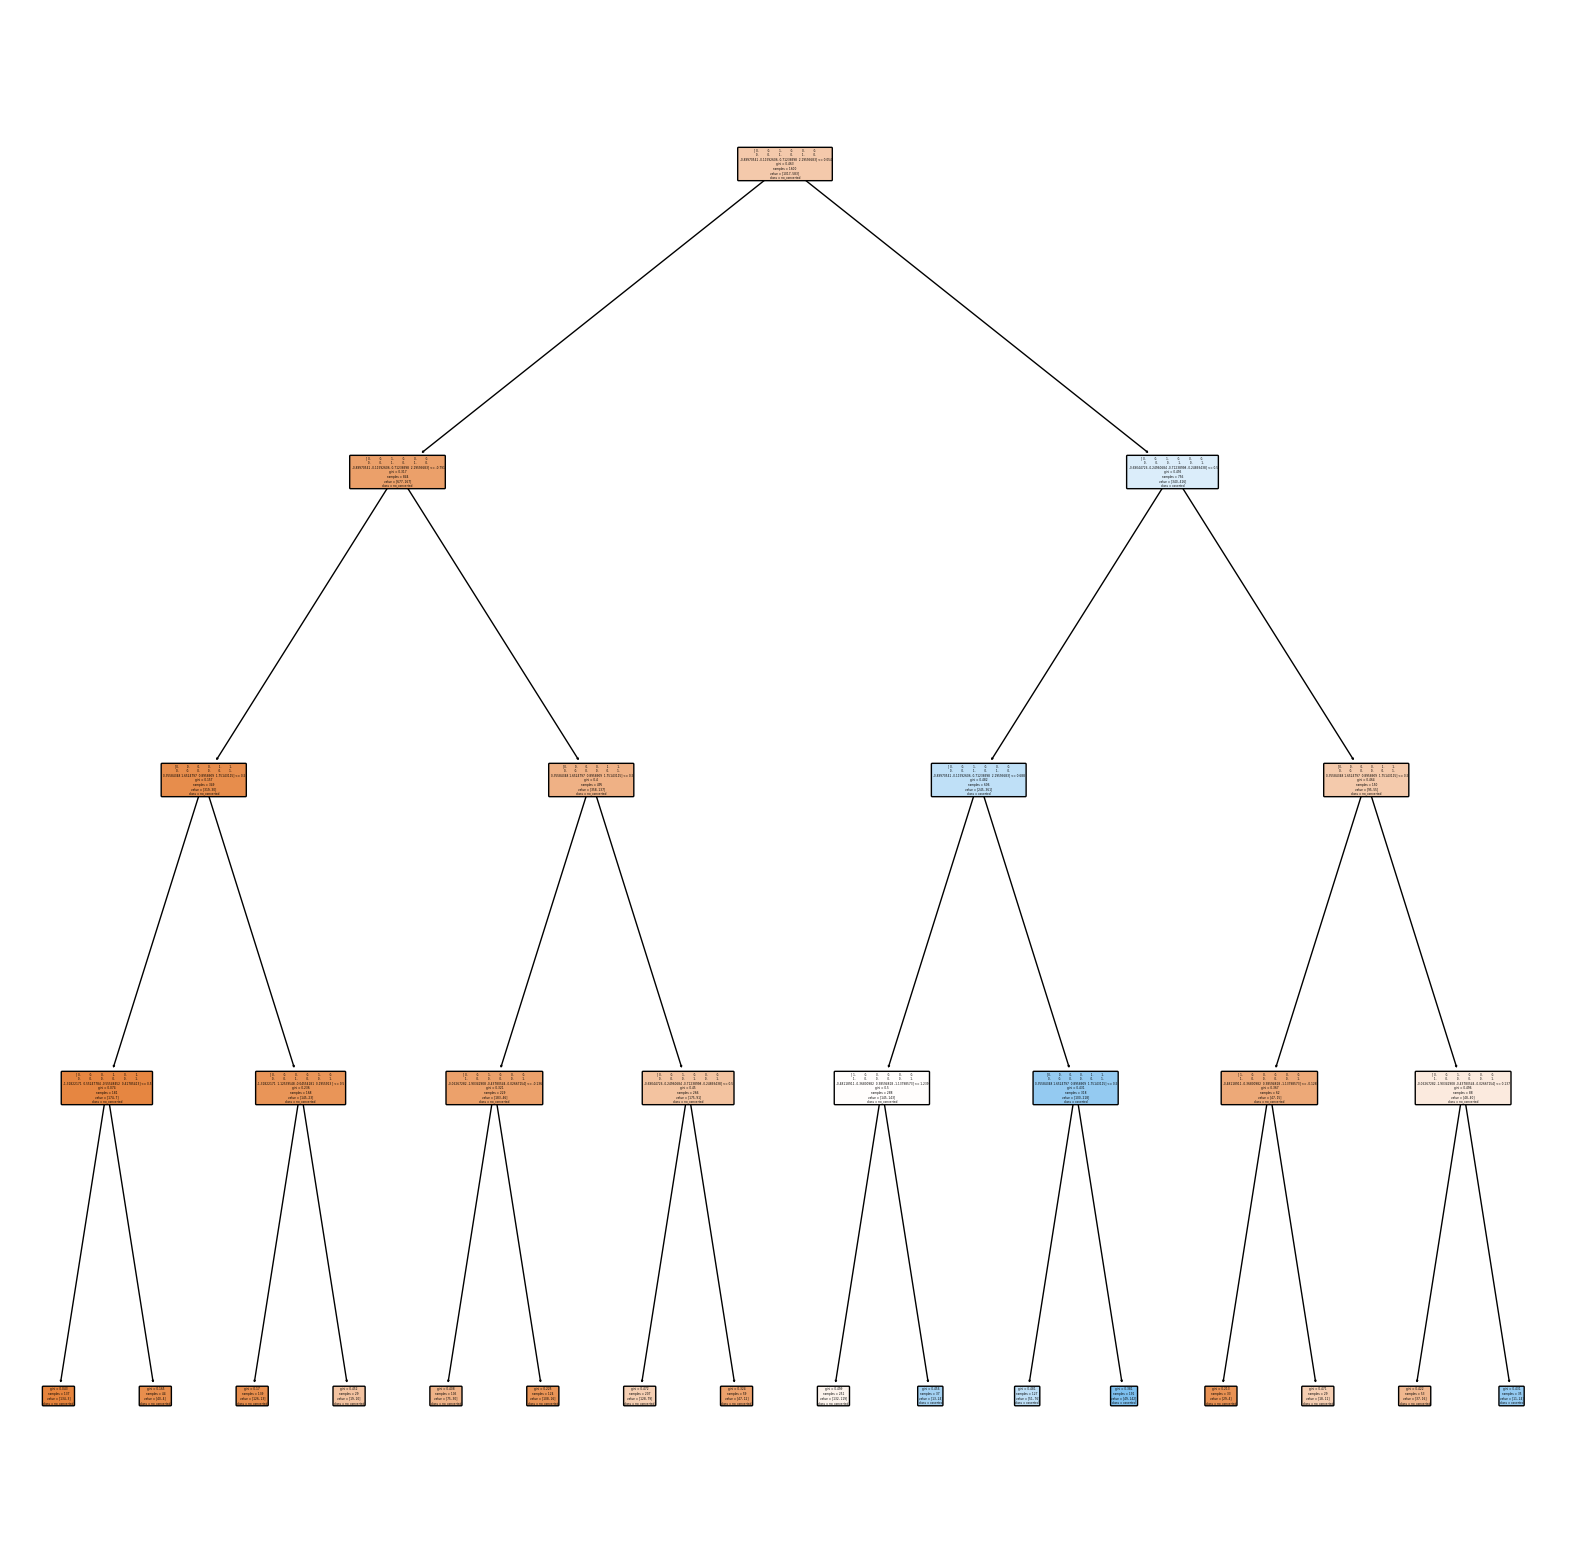

In [177]:
plt.figure(figsize=(20,20))
plot_tree(dt_best, filled=True, rounded=True, class_names=['no_converted','coverted'], feature_names=X_transformed);

In [178]:
# Compute metrics
print("Naive Bayes Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_nb))
print("Accuracy: ", accuracy_score(y_test, y_pred_nb))
print("Precision: ", precision_score(y_test, y_pred_nb))
print("Recall: ", recall_score(y_test, y_pred_nb))
print("F1 Score: ", f1_score(y_test, y_pred_nb))

print("\nK-Nearest Neighbors Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_knn))
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Precision: ", precision_score(y_test, y_pred_knn))
print("Recall: ", recall_score(y_test, y_pred_knn))
print("F1 Score: ", f1_score(y_test, y_pred_knn))

print("\nDecisionTrees Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_dt))
print("Accuracy: ", accuracy_score(y_test, y_pred_dt))
print("Precision: ", precision_score(y_test, y_pred_dt))
print("Recall: ", recall_score(y_test, y_pred_dt))
print("F1 Score: ", f1_score(y_test, y_pred_dt))

print("\nSVC Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_svc))
print("Accuracy: ", accuracy_score(y_test, y_pred_svc))
print("Precision: ", precision_score(y_test, y_pred_svc))
print("Recall: ", recall_score(y_test, y_pred_svc))
print("F1 Score: ", f1_score(y_test, y_pred_svc))

Naive Bayes Metrics: 
Confusion Matrix:  [[206  33]
 [ 78  83]]
Accuracy:  0.7225
Precision:  0.7155172413793104
Recall:  0.515527950310559
F1 Score:  0.5992779783393501

K-Nearest Neighbors Metrics: 
Confusion Matrix:  [[212  27]
 [ 91  70]]
Accuracy:  0.705
Precision:  0.7216494845360825
Recall:  0.43478260869565216
F1 Score:  0.5426356589147286

DecisionTrees Metrics: 
Confusion Matrix:  [[200  39]
 [ 81  80]]
Accuracy:  0.7
Precision:  0.6722689075630253
Recall:  0.4968944099378882
F1 Score:  0.5714285714285714

SVC Metrics: 
Confusion Matrix:  [[206  33]
 [ 72  89]]
Accuracy:  0.7375
Precision:  0.7295081967213115
Recall:  0.5527950310559007
F1 Score:  0.6289752650176679
